In [84]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from class_function_V1 import TimeSeriesAnalysis #Função que processa os dados, separando no grupo de 53 setores
import numpy as np
from pySSA.core import MSSA
from pySSA.simple import SSA


# Leitura do arquivo Excel
df_raw = pd.read_excel("Data_set/Base de Dados.xlsx")
df_raw = df_raw.drop(['29.1 Fabricação de automóveis, camionetas e utilitários'], axis=1)

# numeric_cols = df_raw.select_dtypes(include=[np.number]).columns
# df_log = df_raw.copy()
# df_log[numeric_cols] = np.log(df_raw[numeric_cols])

# # Criação de instância da classe TimeSeriesAnalysis=
tsa = TimeSeriesAnalysis(df_raw)
tsa.df_macro_sectors.head()

,10.1,10.3,10.4,10.5,10.6,10.7,10.8,11.1,11.2,13.1,...,28.1,28.3,28.5,28.6,29.2,29.3,29.4,31.0,32.1,32.9
0,91.40786,57.68000,49.70871,105.83952,95.41459,34.33063,60.81378,71.39526,54.24480,148.18311,...,69.01448,63.04126,34.66032,67.88325,43.12274,66.68923,68.50509,79.25601,25.59197,88.98193
1,83.24596,41.90180,69.54644,91.21606,82.86346,34.05861,54.49597,63.05023,52.95140,147.26154,...,76.14313,69.36590,41.24713,65.54244,47.66524,63.09203,71.20140,67.68894,25.50763,77.31141
2,84.58352,35.39864,99.63747,92.74546,93.01216,26.51873,63.11382,66.56874,55.16932,161.74803,...,78.18696,79.29823,45.17458,77.40322,54.45482,68.69559,76.45812,79.81821,55.22744,77.68994
3,90.67809,37.20567,107.68743,93.38113,94.47249,41.59404,63.09991,71.19469,54.62371,173.06138,...,86.11038,74.92392,52.44665,76.22947,57.72323,75.74497,80.05020,86.09536,74.19192,77.72979
4,92.58518,40.00090,106.18162,88.27077,99.61309,115.43943,61.98710,71.55439,53.63159,174.65899,...,86.90989,75.32135,55.25267,77.67343,53.90564,68.78256,77.63754,80.46874,85.85979,75.01919


NameError: name 'tsa' is not defined

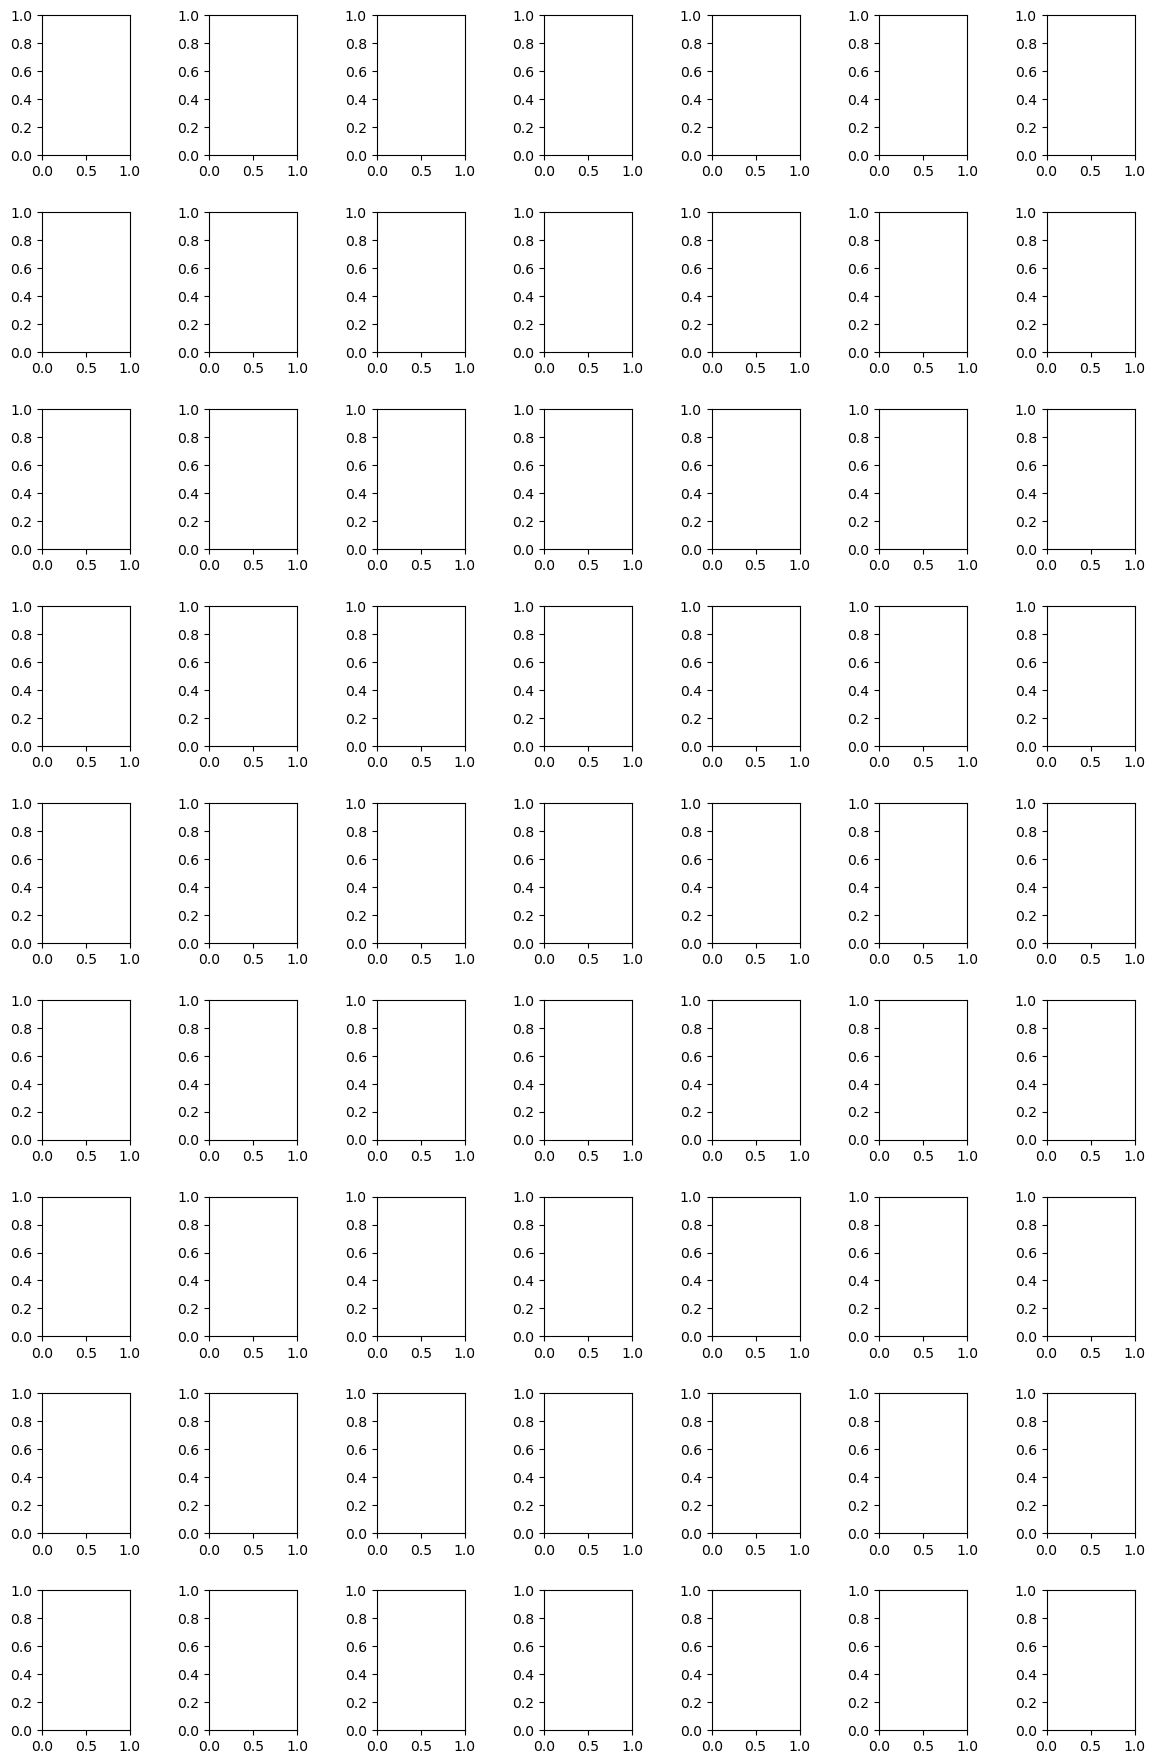

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja chamado df e as colunas estejam nas séries 0 a 52
# Você pode ajustar esse código para corresponder à sua estrutura de dados real

# Cria uma figura e eixos de subplots com tamanho adequado
fig, axs = plt.subplots(9, 7, figsize=(12, 18))
fig.tight_layout(pad=2)  # Espaçamento entre subplots

# Itera pelas colunas e plota cada série em um subplot
for i, col in enumerate(tsa.df_macro_sector.columns):
    ax = axs[i // 6, i % 6]  # Define o eixo do subplot correspondente
    ax.plot(tsa.df_macro_sector[col])  # Plota a série no subplot
    ax.axvline(x=190, color='r', linestyle='--')
    ax.axvline(x=165, color='y', linestyle='--')  # Adiciona a linha vertical no ponto 84
    ax.axvline(x=221, color='g', linestyle='--')  # Adiciona a linha vertical no ponto 221
    ax.set_title(col)  # Define o título do subplot como o nome da coluna

# Ajusta os subplots para que o espaço em branco seja removido
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Exibe o gráfico
plt.show()


In [43]:
import pyperclip
def calculate_stats(df):
    # Calcula a média e a variância de cada série no DataFrame
    mean_values = df.mean()
    variance_values = df.var()

    # Cria um novo DataFrame com os valores de média e variância
    stats_df = pd.DataFrame({'Média': mean_values, 'Variância': variance_values})
    stats_df.to_excel('Descritiva.xlsx', index=True)
    return stats_df
stats_table=calculate_stats(tsa.df_macro_sectors)

In [47]:
# import pandas as pd

# # Supondo que você já tenha a tabela de stats_table

# # Formatação da tabela para string
# formatted_table = stats_table.to_string(formatters={
#     'Média': '{:.2f}'.format,
#     'Variância': '{:.2f}'.format
# })

stats_table.to_excel('Med-var.xlsx', index=True)
# HW.result_df.to_excel('Param_Holt_winters.xlsx', index=False)

In [31]:

# Seleciona as 15 maiores e as 15 menores variâncias
maiores_variancias = stats_table.nlargest(53, 'Variância')
#menores_variancias = stats_table.nsmallest(15, 'Variância')

print("15 Maiores Variâncias:")
print(maiores_variancias)

# print("\n15 Menores Variâncias:")
# print(menores_variancias)

15 Maiores Variâncias:
           Média    Variância
19.3  115.796742  4879.538577
32.1  100.805543  4854.846062
27.4  102.909006  4291.342617
10.7  100.201653  3984.386858
20.5   98.213893  2174.107171
10.3   84.448164  1587.871164
29.2   91.642985  1112.666262
13.1  109.490839  1046.351237
26.2   82.547372   850.844304
13.2  102.341837   846.728306
14.1   98.660349   717.096532
28.5   82.818552   673.232148
26.4   94.366056   667.271349
29.3   84.189270   596.467079
17.1  104.114821   591.335844
14.2   85.399910   559.319404
28.6  102.679805   539.373452
24.5   99.055645   514.427766
13.3   83.313202   458.015768
29.1   77.859430   445.953045
29.4   86.012269   424.015143
28.3   90.031985   402.207103
20.7   81.214905   334.793169
10.8   93.134946   328.195775
15.1   97.157908   305.083099
24.1   94.794130   287.106012
27.5   81.668177   284.764480
11.2   85.762309   282.707254
23.3   80.267194   239.846563
11.1   91.957767   234.365823
25.3   86.435879   226.567795
25.4   87.812023 

c:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

c:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

c:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



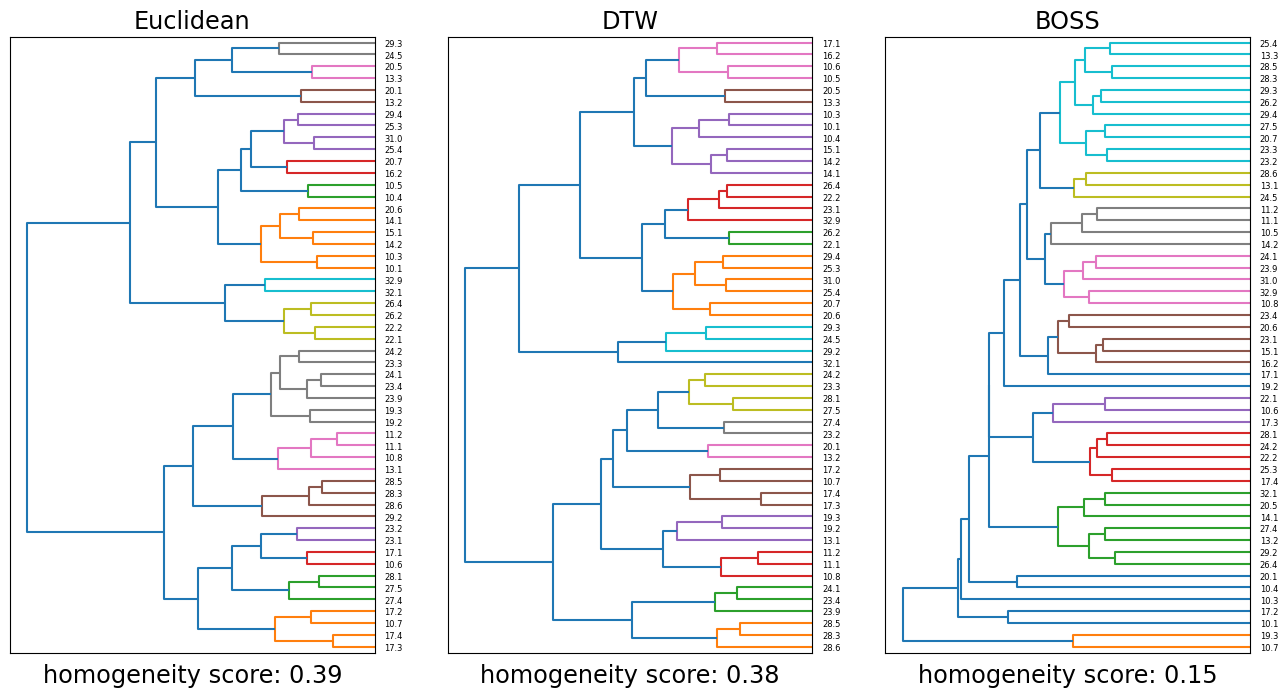

In [104]:
# Author: Lucas Plagwitz <lucas.plagwitz@uni-muenster.de>
# License: BSD-3-Clause

import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import homogeneity_score
from sklearn.cluster import AgglomerativeClustering

from pyts.metrics import dtw, boss
from pyts.transformation import BOSS
from pyts.datasets import make_cylinder_bell_funnel


def create_dist_matrix(dataset, dist_func, **kwargs):
    distance_mat = np.zeros((len(dataset), len(dataset)))
    for i, j in itertools.product(range(len(dataset)),
                                  range(len(dataset))):
        distance_mat[i, j] = dist_func(dataset[i], dataset[j], **kwargs)
    return distance_mat


def plot_dendrogram(model, **kwargs):
    # function copied from sklearn:
    # plot_agglomerative_dendrogram.html
    #
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,
               color_threshold=sorted(model.distances_)[-15], **kwargs)
    # dendrogram(linkage_matrix, color_threshold=0, **kwargs)

n_clusters=5

fig, axes = plt.subplots(1, 3, figsize=(16, 8))

X = tsa.df_macro_sectors.T
num_colunas=tsa.df_macro_sectors.shape[1]
y = tsa.df_macro_sectors.columns.tolist()

# y = np.repeat(np.arange(n_clusters), np.ceil(num_colunas / n_clusters))[:num_colunas]

for k_axis, metric in enumerate(["Euclidean", "DTW", "BOSS"]):
    if metric == "DTW":
        dist_mat = create_dist_matrix(X, dtw)
    elif metric == "BOSS":
        dist_mat = create_dist_matrix(BOSS(sparse=False, n_bins=7,
                                           word_size=3).fit_transform(X),
                                      boss)
    else:
        dist_mat = create_dist_matrix(X, euclidean)

    model = AgglomerativeClustering(compute_full_tree=True,
                                    compute_distances=True,
                                    n_clusters=n_clusters, affinity="precomputed",
                                    linkage="complete")
    cluster = model.fit_predict(dist_mat)
    score = round(homogeneity_score(labels_true=y, labels_pred=cluster), 2)

    plot_dendrogram(model, orientation='left', ax=axes[k_axis], labels=y)
    axes[k_axis].set_xticks([], [])
    axes[k_axis].set_title(metric, size='xx-large')
    axes[k_axis].set_xlabel(f"homogeneity score: {score}", size='xx-large')

plt.show()



AttributeError: 'DataFrame' object has no attribute 'tolist'

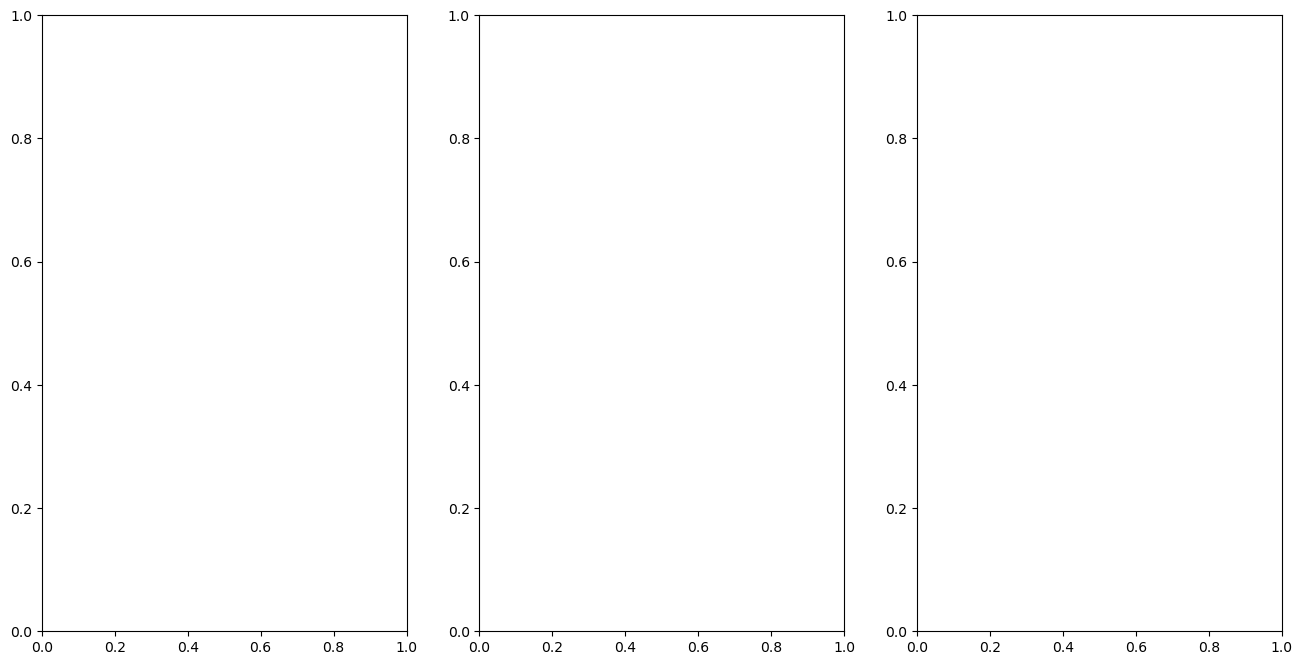

In [106]:
# Author: Lucas Plagwitz <lucas.plagwitz@uni-muenster.de>
# License: BSD-3-Clause

import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import homogeneity_score
from sklearn.cluster import AgglomerativeClustering

from pyts.metrics import dtw, boss
from pyts.transformation import BOSS
from pyts.datasets import make_cylinder_bell_funnel


def create_dist_matrix(dataset, dist_func, **kwargs):
    distance_mat = np.zeros((len(dataset), len(dataset)))
    for i, j in itertools.product(range(len(dataset)),
                                  range(len(dataset))):
        distance_mat[i, j] = dist_func(dataset[i], dataset[j], **kwargs)
    return distance_mat


def plot_dendrogram(model, **kwargs):
    # function copied from sklearn:
    # plot_agglomerative_dendrogram.html
    #
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,
               color_threshold=sorted(model.distances_)[-3], **kwargs)
    # dendrogram(linkage_matrix, color_threshold=0, **kwargs)

n_clusters=5

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
X = df_macro_sectors_cru.T
num_colunas=df_macro_sectors_cru.shape[1]
y = df_macro_sectors_cru.tolist()
# y = np.repeat(np.arange(n_clusters), np.ceil(num_colunas / n_clusters))[:num_colunas]

for k_axis, metric in enumerate(["Euclidean", "DTW", "BOSS"]):
    if metric == "DTW":
        dist_mat = create_dist_matrix(X, dtw)
    elif metric == "BOSS":
        dist_mat = create_dist_matrix(BOSS(sparse=False, n_bins=3,
                                           word_size=3).fit_transform(X),
                                      boss)
    # else:
    #     dist_mat = create_dist_matrix(X, euclidean)

    model = AgglomerativeClustering(compute_full_tree=True,
                                    compute_distances=True,
                                    n_clusters=n_clusters, affinity="precomputed",
                                    linkage="complete")
    cluster = model.fit_predict(dist_mat)
    #score = round(homogeneity_score(labels_true=y, labels_pred=cluster), 2)

    plot_dendrogram(model, orientation='left', ax=axes[k_axis], labels=y)
    axes[k_axis].set_xticks([], [])
    axes[k_axis].set_title(metric, size='xx-large')
    #axes[k_axis].set_xlabel(f"homogeneity score: {score}", size='xx-large')

plt.show()


In [64]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def decompose_all(base, adt_mul, freq):
    start_date = pd.to_datetime('01/2002', format='%m/%Y')
    end_date = pd.to_datetime('01/2023', format='%m/%Y')
    df_decom = pd.DataFrame()
    df_decom_trend = pd.DataFrame()
    df_decom_seasonal = pd.DataFrame()
    df_decom_residual = pd.DataFrame()
    df_decom['date'] = pd.date_range(start=start_date, end=end_date, freq='M')

    for col in base.columns:
        df_dec = pd.DataFrame()
        df_dec['date'] = df_decom['date']

        if pd.api.types.is_numeric_dtype(base[col]):
            df_dec['value'] = base[col].values
            df_dec = df_dec.set_index('date')

            # Realizar a decomposição
            decomposition = sm.tsa.seasonal_decompose(df_dec['value'], model=adt_mul, extrapolate_trend=freq)

            # # Acessar as componentes individuais
            # df_decom[col + '_cru'] = df_dec['value']
            # df_decom_trend[col + '_trend'] = decomposition.trend
            # df_decom_seasonal[col + '_seasonal'] = decomposition.seasonal
            # df_decom_residual[col + '_residual'] = decomposition.resid

            # Acessar as componentes individuais
            df_decom[col] = df_dec['value']
            df_decom_trend[col] = decomposition.trend
            df_decom_seasonal[col] = decomposition.seasonal
            df_decom_residual[col] = decomposition.resid
    return df_decom, df_decom_trend, df_decom_seasonal, df_decom_residual

In [87]:
df_macro_sectors_cru,df_macro_sectors_trend, df_macro_sectors_seasonal, df_macro_sectors_residual =decompose_all(tsa.df_macro_sectors, 'additive', 12) #additive - multiplicative


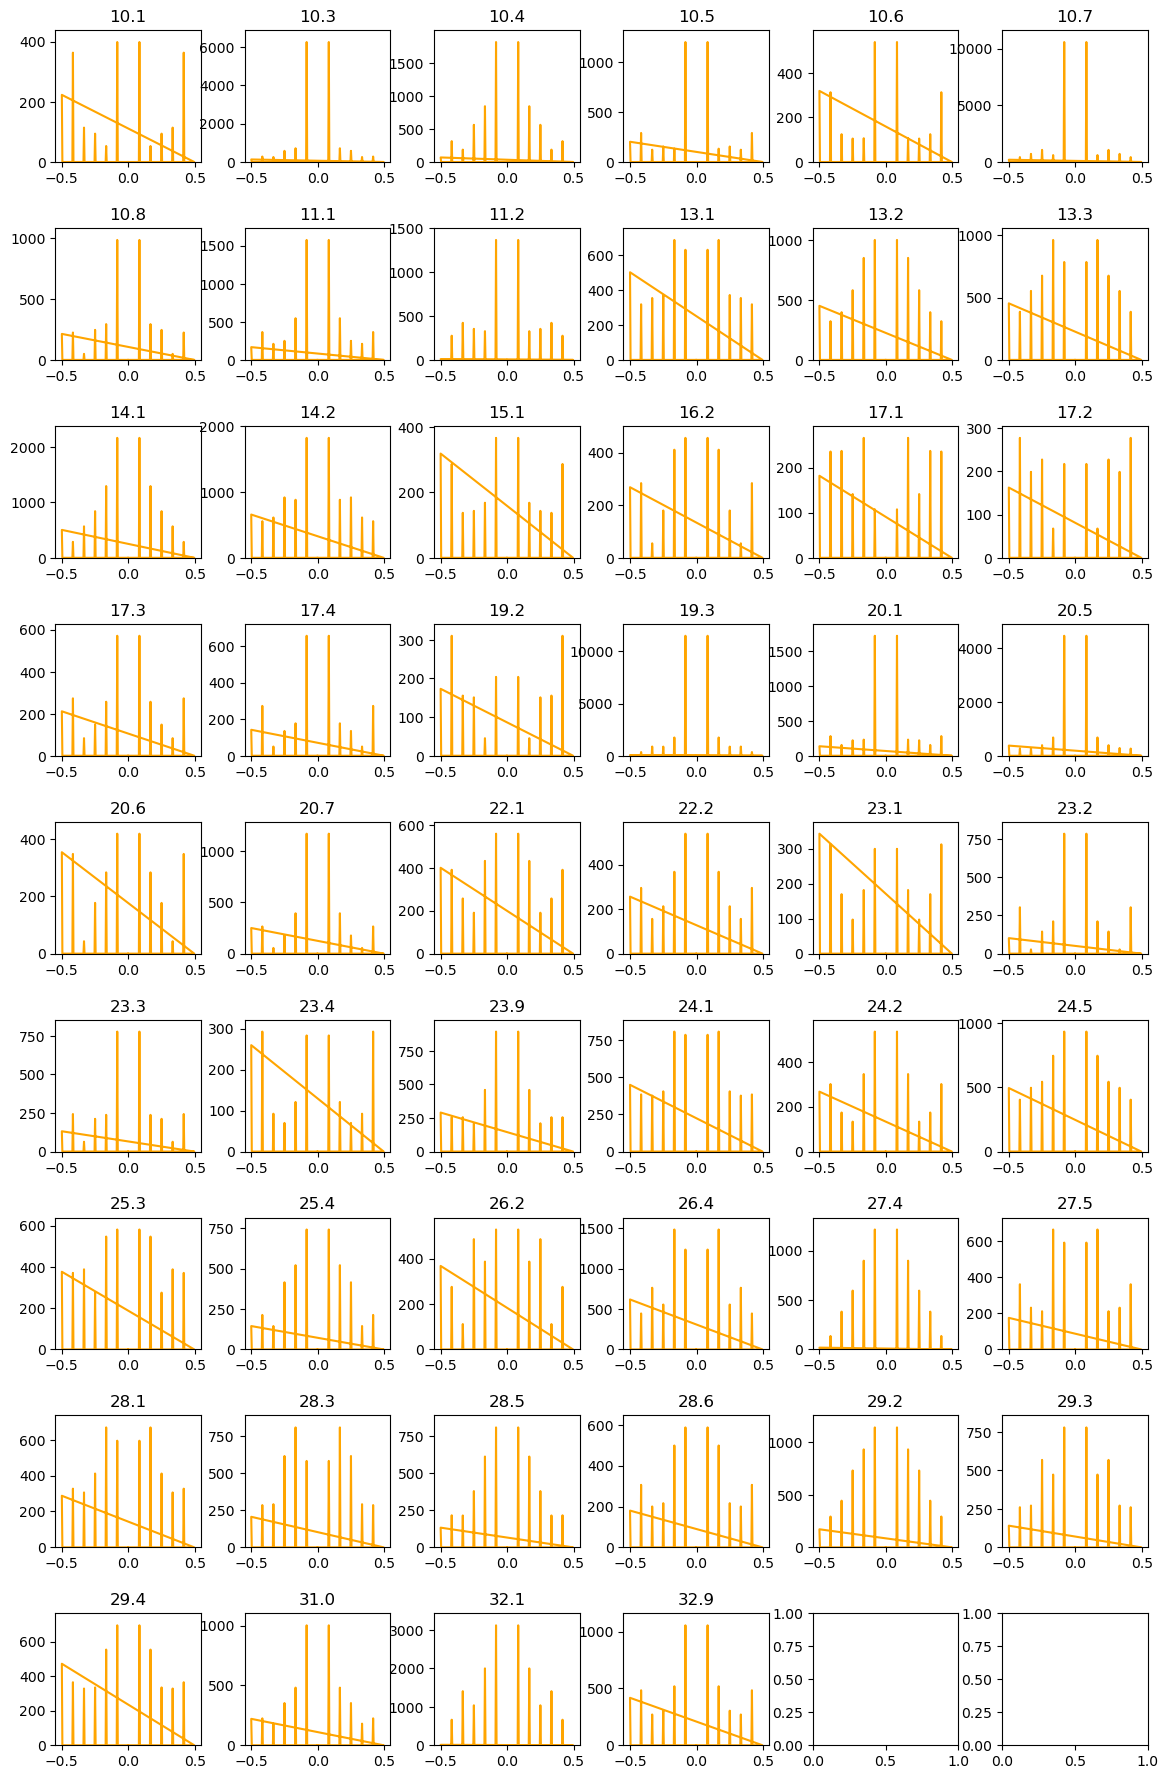

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cria uma figura e eixos de subplots com tamanho adequado
fig, axs = plt.subplots(9, 6, figsize=(12, 18))
fig.tight_layout(pad=2)  # Espaçamento entre subplots

# Itera pelas colunas e plota a FFT de cada série em um subplot
for i, col in enumerate(df_macro_sectors_seasonal.columns):
    ax = axs[i // 6, i % 6]  # Define o eixo do subplot correspondente

    # Exclui a média da série
    x = df_macro_sectors_seasonal[col].values
    x = x - x.mean()

    # Calcula a FFT da série com a média excluída
    fft_values = np.fft.fft(x)
    fft_freq = np.fft.fftfreq(len(x))

    # Plota a FFT no subplot
    ax.plot(fft_freq, np.abs(fft_values), color='orange')
    ax.set_title(col)  # Define o título do subplot como o nome da coluna
    ax.set_ylim(0, np.max(np.abs(fft_values)) * 1.1)  # Ajusta a escala do eixo y da FFT

# Ajusta os subplots para que o espaço em branco seja removido
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Exibe o gráfico
plt.show()


In [98]:
df_macro_sectors_seasonal.reset_index(drop=True, inplace=True)
df_macro_sectors_seasonal

,10.1,10.3,10.4,10.5,10.6,10.7,10.8,11.1,11.2,13.1,...,28.1,28.3,28.5,28.6,29.2,29.3,29.4,31.0,32.1,32.9
0,-0.422948,-10.773560,-27.262706,10.154441,-1.985914,-69.480408,-9.312434,5.682516,0.141299,-6.334416,...,-7.408889,-10.371651,-11.835092,-9.667609,-19.477314,-13.435619,-4.897713,-6.084640,-56.308054,-3.486087
1,-6.865750,-35.211603,-16.316465,-1.441250,-9.262356,-78.956273,-10.032680,-4.780028,-6.601690,-4.389325,...,-2.571605,-0.379935,-2.868278,-1.509182,-4.798072,-4.503658,-4.230361,-9.082321,-34.714532,-10.600599
2,1.204507,-40.353452,4.639223,0.823890,1.770099,-82.285678,2.752936,-6.419511,0.355432,5.831370,...,5.256361,7.101363,6.370876,1.636494,5.555174,3.779218,4.742647,-1.988899,-11.271329,0.896144
3,-3.802011,-51.398657,8.552437,-7.785064,-1.421727,-50.939649,2.385731,-10.807884,-9.655379,0.228107,...,-2.313451,-4.342888,-0.641616,-5.266167,-3.672926,-4.490978,-1.960376,-6.919179,-10.832326,-7.268331
4,1.930751,-43.810330,12.761241,-9.298269,3.206647,19.184748,5.300613,-6.937994,-9.323413,2.647794,...,0.883378,-1.503331,2.564386,-1.449753,2.744792,1.027509,2.759775,-3.015289,12.158849,-3.605538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,4.707935,42.265090,7.546986,0.635572,4.308858,77.891357,5.690783,-3.323927,-1.593702,5.756129,...,7.064497,6.404238,7.439702,4.089590,10.249728,7.150384,7.268008,4.308088,14.600062,9.524054
248,-0.241236,42.580940,1.196894,1.360350,0.771461,68.783420,0.716109,0.822273,4.045821,2.787807,...,3.166365,3.893864,3.470298,6.097992,4.605518,1.494835,2.653616,3.459622,22.155135,6.706360
249,3.067148,46.026295,2.470993,7.159792,2.490266,52.888863,1.352899,10.640449,8.664887,6.077842,...,7.417171,10.351807,3.891846,10.329066,12.126558,7.861789,5.091171,11.041268,14.628056,13.415949
250,-1.922520,31.288836,-4.160492,7.487823,-0.942292,2.120529,-1.505557,11.058767,11.638207,3.540078,...,3.386902,4.567557,-0.737515,0.671584,5.891959,4.934110,1.746682,13.515211,25.438100,4.602722
